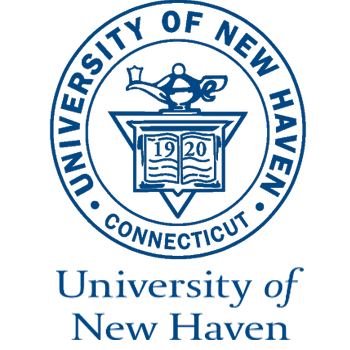
# <center>           project 01- ANOVA Analysis

## <center>Introduction to  Data Scicence -6002 (section 03)


<center> 
    <font size="3"> <br> <br> <b> Submitted by TEAM 9: </b>
        <br> Sudheer kumar tatavalu
        <br> Sai Teja Thota
        <br> Srikanth Thota
        <br> Saileela Uruvakili
        <br> Sesha Sai Veerla

 ## <center>Under the guidance of:
 <center>Minkyu Kim (Adjunct Faculty)
  
 ___

# ABSTRACT

### Background:
In this study, subjects from Central Prison in Raleigh, NC, volunteered for an experiment aimed at investigating the impact of different treatments on psychopathic deviant T scores. These scores, which measure a person's need for control or their rebellion against control, were part of the Minnesota Multiphasic Personality Inventory (MMPI) test.

### Purpose:
The goal of the experiment was to identify a treatment that reduces subjects' psychopathic deviant T scores. The experiment involved three treatment groups, each subjected to different conditions. The research aimed to determine if there were significant differences in the scores based on the treatments provided.

### Methods:
A total of forty-two subjects were randomly assigned to three treatment groups:
1. Four hours of sensory restriction plus a 15-minute "therapeutic" tape.
2. Four hours of sensory restriction plus a 15-minute "emotionally neutral" tape on training hunting dogs.
3. Four hours of sensory restriction with no taped message.

Analysis involved using ANOVA to compare means across the three treatment groups. Exploratory Data Analysis (EDA) was conducted to prepare the dataset for ANOVA, and hypothesis testing was performed with the null hypothesis assuming no difference among the means.

### Results:
The analysis revealed that the p-value was less than the significance level, and the F-statistic exceeded the F-critical value. As a result, the null hypothesis was rejected in favor of the alternative hypothesis, indicating significant differences among the means of the treatment groups.

### Conclusion:
Based on the significant evidence, it is concluded that there are differences in psychopathic deviant T scores among the treatment groups. Further analysis identified specific pairs of groups with different means: 1) "Four hours of sensory restriction plus a therapeutic tape" - "Four hours of sensory restriction with no taped message" and 2) "Four hours of sensory restriction plus an emotionally neutral tape on training hunting dogs" - "Four hours of sensory restriction with no taped message." These findings suggest that the type of treatment has a significant impact on psychopathic deviant T scores.

---
# THEORY

### What is ANOVA?
> ANOVA (Analysis of Variance) is a statistical analysis technique that divides systematic components from random factors to account for the observed aggregate variability within a data set. The presented data set is statistically affected by the systematic factors but not by the random ones. The ANOVA test is used by analyst to evaluate the impact of independent factors on the dependent variables in a regression analysis. ANOVA is also called as Fisher Analysis of variance and it is the extension of the t-test and z-test.
### Types of ANOVA:
> 1. One-way ANOVA <br >
> 2. Two-way ANOVA <br >
> 3. N-way ANOVA
### ANOVA Assumptions:
> 1. Normally distributed population derives different group samples. <br>
> 2. The sample or distribution has a homogenous variance <br>
> 3. Analyst draw all the data in a sample independently.
### ANOVA Formula: 
> ANOVA coefficient (F) = Mean sum of squares between the groups / Mean squares of Errors. <br> <br>
> $ F = \frac{MSG}{MSE} $
### INTERPRETATIONS:
The ANOVA test relies on the comparison between the null hypothesis (H0), stating that all group means are equal, and the alternative hypothesis, suggesting that at least one group mean is different. The pivotal value in ANOVA is the p-value. If the calculated p-value is below a chosen significance level, typically 0.05, the analyst rejects the null hypothesis. In practical terms, this means there is enough evidence to conclude that not all group means are equal. Conversely, if the p-value exceeds 0.05, the analyst accepts the null hypothesis, indicating that there isn't sufficient evidence to claim a difference in means among the groups.


---

<h3><center style=color:black>Exploratory Data Analysis</center></h3>                     

In [20]:
### Import required libraries
import math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore') 

connection = sqlite3.connect('DSCI6002_prj1_data.db')
cursor = connection.cursor()

# reading all table names
table_list = [a for a in cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]
# here is you table list
print(table_list)

cursor.close()
connection.close()


[('prj1',)]


In [39]:
import sqlite3
import pandas as pd
  
# create a connection
con = sqlite3.connect('DSCI6002_prj1_data.db')
df = pd.read_sql_query('Select * from prj1;', con)
df.drop(columns = ["index"], inplace = True)
con.close()
df

,pre_trt1,post_trt1,pre_trt2,post_trt2,pre_trt3,post_trt3
0,67,74,88,79,86,90
1,86,50,79,81,53,53
2,64,64,67,83,81,102
3,69,76,83,74,69,67
4,67,64,79,76,81,76
5,79,81,76,69,76,81
6,67,74,71,71,74,69
7,67,50,67,75,60,60
8,69,60,69,64,67,69
9,57,57,67,64,86,83


#### Metadata - Information regarding the columns of dataset

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   pre_trt1   14 non-null     int64
 1   post_trt1  14 non-null     int64
 2   pre_trt2   14 non-null     int64
 3   post_trt2  14 non-null     int64
 4   pre_trt3   14 non-null     int64
 5   post_trt3  14 non-null     int64
dtypes: int64(6)
memory usage: 804.0 bytes


#### Basic stats about each numerical feature


In [41]:
df.describe()

,pre_trt1,post_trt1,pre_trt2,post_trt2,pre_trt3,post_trt3
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,73.000000,66.785714,74.928571,72.071429,73.928571,77.142857
std,10.451353,10.085622,7.054342,6.509925,9.856386,15.006958
min,57.000000,50.000000,67.000000,64.000000,53.000000,53.000000
25%,67.000000,60.500000,67.500000,65.250000,69.500000,69.000000
50%,69.000000,67.500000,75.000000,72.500000,74.000000,73.500000
75%,78.250000,75.500000,80.500000,75.750000,81.000000,82.500000
max,93.000000,81.000000,88.000000,83.000000,86.000000,107.000000


In [42]:
df.shape

(14, 6)

In [43]:
df['difference_of_treatment1'] =df['pre_trt1']- df['post_trt1'] 
df['difference_of_treatment2'] =df['pre_trt2']- df['post_trt2'] 
df['difference_of_treatment3'] =df['pre_trt3']- df['post_trt3'] 
df1 = df.drop(['pre_trt1','post_trt1','pre_trt2','post_trt2','pre_trt3','post_trt3'],axis=1)
df1

,difference_of_treatment1,difference_of_treatment2,difference_of_treatment3
0,-7,9,-4
1,36,-2,0
2,0,-16,-21
3,-7,9,2
4,3,3,5
5,-2,7,-5
6,-7,0,5
7,17,-8,0
8,9,5,-2
9,0,3,3


In [44]:
df1['difference_of_treatment1'].describe()

count    14.000000
mean      6.214286
std      12.298709
min      -7.000000
25%      -1.500000
50%       1.500000
75%      14.000000
max      36.000000
Name: difference_of_treatment1, dtype: float64

In [45]:
df1['difference_of_treatment2'].describe()

count    14.000000
mean      2.857143
std       7.940714
min     -16.000000
25%       0.750000
50%       3.000000
75%       7.000000
max      17.000000
Name: difference_of_treatment2, dtype: float64

In [47]:
df1['difference_of_treatment3'].describe()

count    14.000000
mean     -3.214286
std       8.568085
min     -21.000000
25%      -4.750000
50%       0.000000
75%       2.750000
max       5.000000
Name: difference_of_treatment3, dtype: float64

#### Metadata - Information regarding the columns of dataset

In [48]:

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   difference_of_treatment1  14 non-null     int64
 1   difference_of_treatment2  14 non-null     int64
 2   difference_of_treatment3  14 non-null     int64
dtypes: int64(3)
memory usage: 468.0 bytes


#### Basic stats about each numerical feature

In [49]:
df1.describe()

,difference_of_treatment1,difference_of_treatment2,difference_of_treatment3
count,14.000000,14.000000,14.000000
mean,6.214286,2.857143,-3.214286
std,12.298709,7.940714,8.568085
min,-7.000000,-16.000000,-21.000000
25%,-1.500000,0.750000,-4.750000
50%,1.500000,3.000000,0.000000
75%,14.000000,7.000000,2.750000
max,36.000000,17.000000,5.000000


In [52]:
df1.shape

(14, 3)

In [53]:
d_melt = pd.melt(df1.reset_index(),
                 id_vars = ['index'],
                 value_vars = ['difference_of_treatment1','difference_of_treatment2','difference_of_treatment3'])
d_melt.columns = ['index', 'treatments','value']
d_melt

,index,treatments,value
0,0,difference_of_treatment1,-7
1,1,difference_of_treatment1,36
2,2,difference_of_treatment1,0
3,3,difference_of_treatment1,-7
4,4,difference_of_treatment1,3
5,5,difference_of_treatment1,-2
6,6,difference_of_treatment1,-7
7,7,difference_of_treatment1,17
8,8,difference_of_treatment1,9
9,9,difference_of_treatment1,0


In [54]:
d_melt.shape

(42, 3)

#### Unique values for the categorical feature

In [55]:
print("Following are the unique values corresponding to the feature 'Treatment' :")
for idx, treatment in enumerate(d_melt['treatments'].unique()):
    print(str(idx + 1) + " " + treatment)

Following are the unique values corresponding to the feature 'Treatment' :
1 difference_of_treatment1
2 difference_of_treatment2
3 difference_of_treatment3


#### Vizualize Unique Values Count

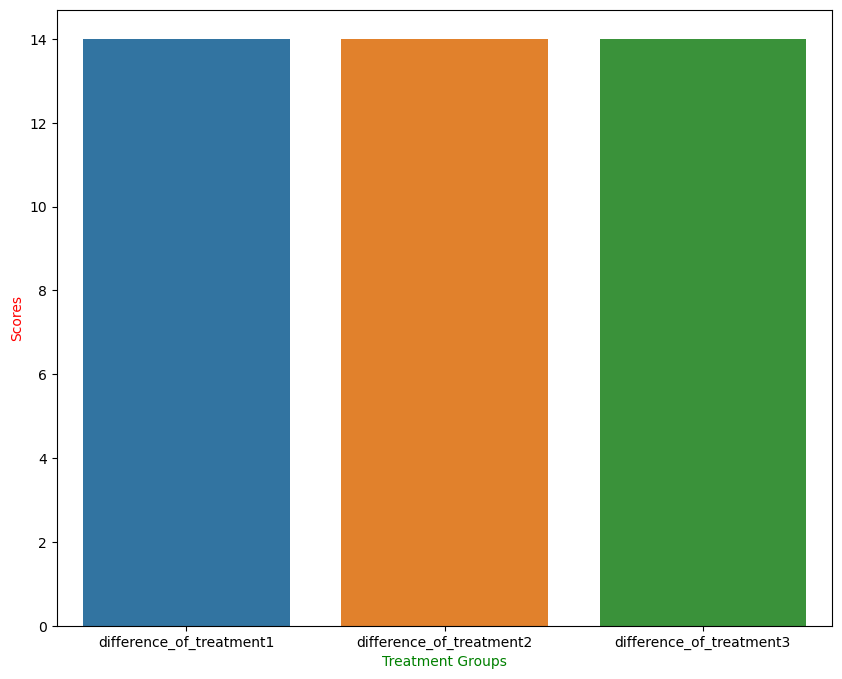

In [56]:
d_melt['treatments'] = d_melt['treatments'].astype('category')

fig, ax = plt.subplots(figsize= (10, 8))

sns.countplot(x='treatments',data=d_melt, ax = ax)
ax.set_ylabel("Count")

plt.xlabel('Treatment Groups', color='green')
plt.ylabel('Scores', color='red')
plt.show()

### Handle null / Missing values


In [57]:
### Null values for each category
print("Following are the null values corresponding to each value of 'Treatment' :")
for idx, treatment in enumerate(d_melt['treatments'].unique()):
    print(str(idx + 1) + " " + treatment + " " + str(d_melt[d_melt['treatments'] == treatment].isna().sum()[1]))

print("Total Null Values: ", d_melt.isna().sum()[1]) 

Following are the null values corresponding to each value of 'Treatment' :
1 difference_of_treatment1 0
2 difference_of_treatment2 0
3 difference_of_treatment3 0
Total Null Values:  0


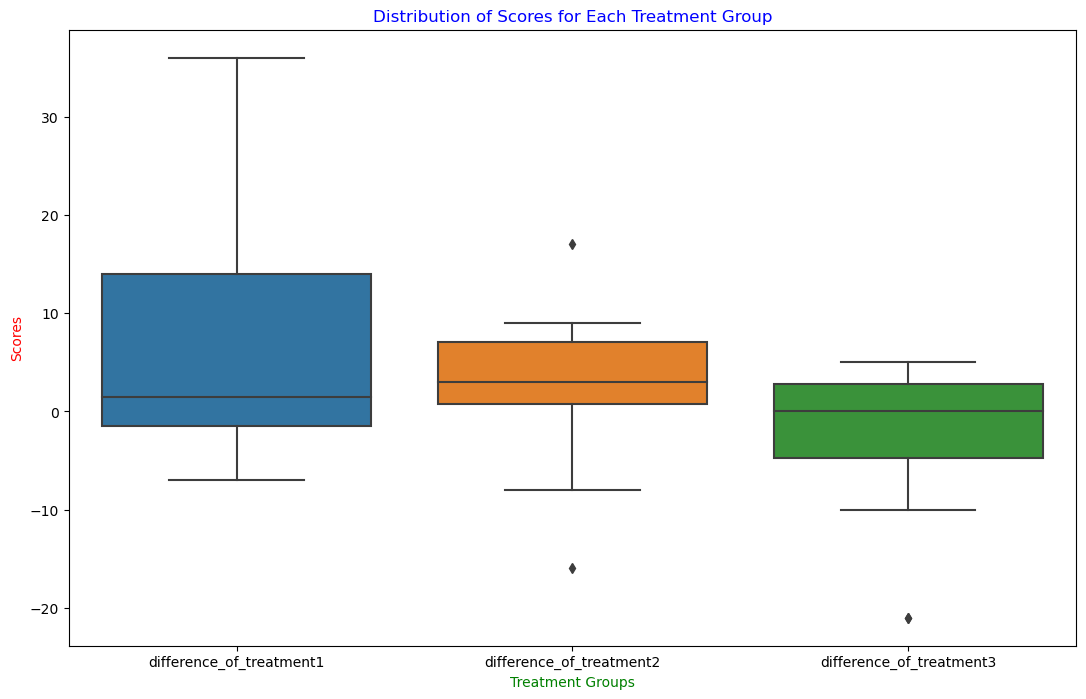

In [58]:
### Visualize each value's distribution
plt.figure(figsize=(13, 8))
sns.boxplot(data=df1).set(
    title='Distribution of Scores for Each Treatment Group',
    xlabel='Treatment Groups',
    ylabel='Scores'
)

# Customize title and axis label colors
plt.title('Distribution of Scores for Each Treatment Group', color='blue')
plt.xlabel('Treatment Groups', color='green')
plt.ylabel('Scores', color='red')

plt.show()

In [69]:
### Basic stats for each category in Treatment Level
d_melt.describe()

,index,value
count,42.000000,42.000000
mean,6.500000,1.952381
std,4.079993,10.335712
min,0.000000,-21.000000
25%,3.000000,-2.000000
50%,6.500000,2.500000
75%,10.000000,6.500000
max,13.000000,36.000000


In [70]:
df1.head()

,difference_of_treatment1,difference_of_treatment2,difference_of_treatment3
0,-7,9,-4
1,36,-2,0
2,0,-16,-21
3,-7,9,2
4,3,3,5


#### Visualize histogram of each category


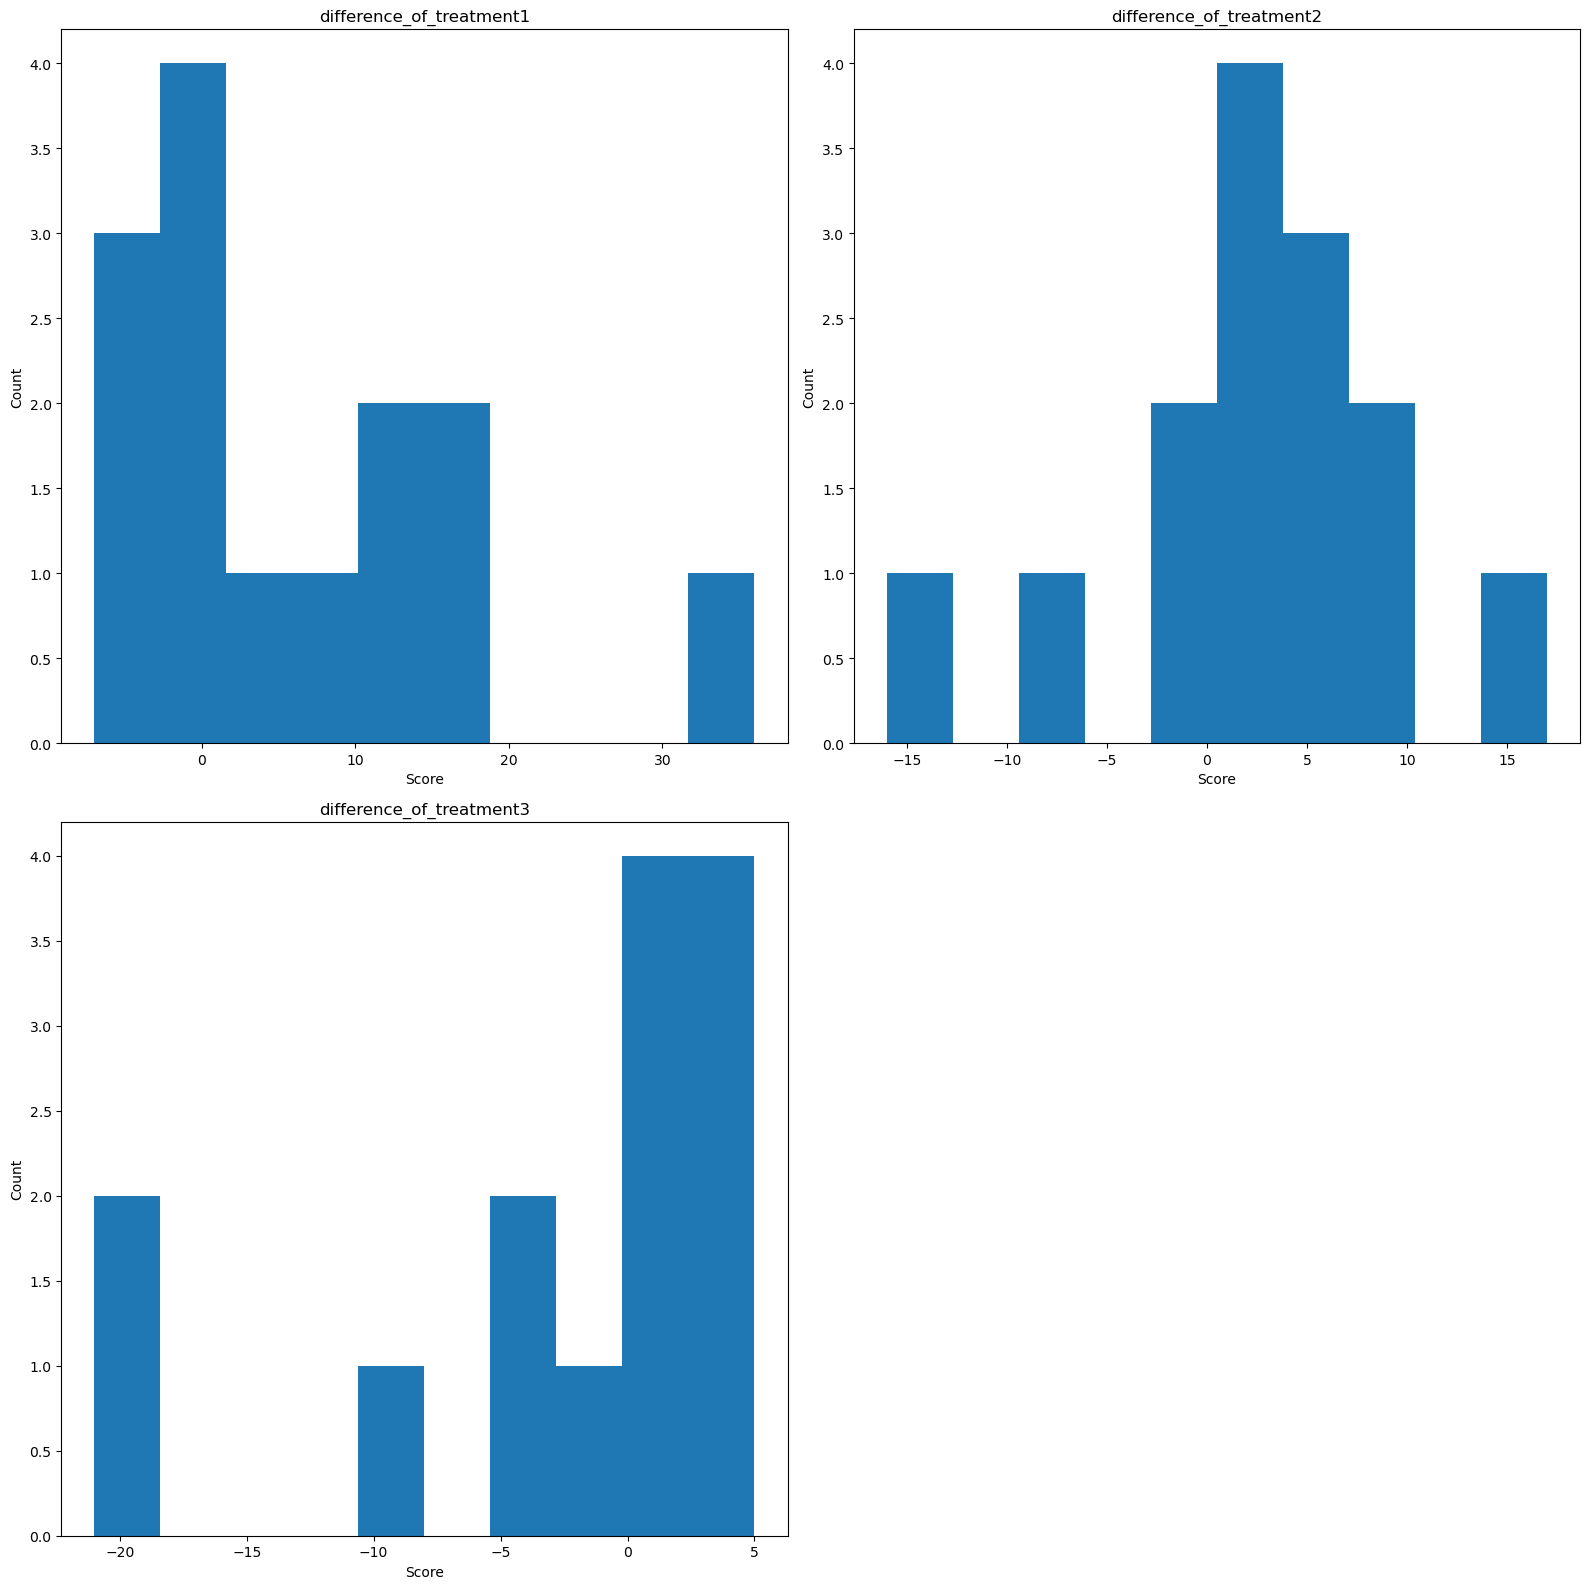

In [71]:
import matplotlib.pyplot as plt

figure, axes = plt.subplots(2, 2, figsize=(16, 16))
axes[1, 1].axis('off')

treatments = ['difference_of_treatment1','difference_of_treatment2','difference_of_treatment3']

for ax, treatment in zip(axes.flatten(), treatments):
    ax.hist(df1[treatment])
    ax.set(xlabel="Score", ylabel="Count", title=treatment)

plt.tight_layout()
plt.show()

   #                     Analysis Results and Explanation:


# ANOVA Analysis

<br> **Defining hypothesis for testing:** <br> <br>
*  Null Hypothesis  <br>

    > $ H_0 $ = There is no significant difference in the mean psychopathic deviant T scores among the three treatment groups <br>
    

*  Alternative Hypothesis <br>

    > $ H_A $ = At least one of the treatment groups has a different mean change in psychopathic deviant T scores compared to the others.
    
In simpler terms, the null hypothesis assumes no difference in mean scores across the treatment groups, while the alternative hypothesis suggests that there is a difference in at least one group. The objective of the ANOVA analysis is to assess whether there is sufficient evidence to reject the null hypothesis in favor of the alternative hypothesis based on the collected data.

##### If F-Statistic is greater than F-Critical value, we reject the null hypothesis.

1.Since the F-Statistic exceeds the critical value (3.33 > 3.23) and the p-value is below the significance threshold (0.046069 < 0.05), we have sufficient evidence to reject the null hypothesis. This implies that there is a difference in the mean scores among at least one of the treatment groups.

2.To identify the specific pairs of groups with divergent means, conducting multiple pairwise comparisons and confirming with homogenity tests is necessary.

In [72]:
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('value ~ C(treatments)', data=d_melt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     3.334
Date:                Thu, 16 Nov 2023   Prob (F-statistic):             0.0461
Time:                        01:02:08   Log-Likelihood:                -153.87
No. Observations:                  42   AIC:                             313.7
Df Residuals:                      39   BIC:                             319.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     6.2143      2.617      2.374      0.023       0.920      11.508
C(treatments)[T.difference_of_treatment2]    -3.3571      3.702     -0.907      0.370     -10.844       4.130
C(treatments)[T.difference_of_treatment3]    -9.4286      3.702     -2.547      0.015     -16.916      -1.942
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   2.378
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.938
Skew:                           0.205   Prob(JB):                        0.380
Kurtosis:                       3.969   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the context of linear regression using Ordinary Least Squares (OLS), the goal is to estimate unknown parameters by constructing a model that minimizes the sum of squared errors between observed and predicted values.

As part of the model assessment, it's crucial to evaluate the Omnibus assumption, a test for the normality of residuals. An optimal scenario involves a value close to 1, indicating conformity with the OLS assumption. Here, the Prob(Omnibus) value of 0.238 suggests that the model satisfies the Omnibus assumption, signifying a reasonable fit.

In [73]:
from scipy.stats import f

# Set the degrees of freedom
df_between = 2  # degrees of freedom for the numerator
df_within = 39  # degrees of freedom for the denominator

# Set the significance level (alpha)
alpha = 0.05

# Find the critical F-value
critical_f = f.ppf(1 - alpha, df_between, df_within)

print(f"Critical F-value: {critical_f}")

Critical F-value: 3.238096135159295


Given that the F-Statistic surpasses the critical value (3.33 > 3.23) and the p-value is below the significance threshold (0.046069 < 0.05), we can confidently reject the null hypothesis. This implies that there exists a disparity in the mean scores among at least one of the treatment groups.

In [74]:
# One Way Anova Model
def anova_model():
    anova_table = sm.stats.anova_lm(model,typ=2)
    anova_table1 = anova_table.copy(deep=True)
    esq_sm=  anova_table['sum_sq'][0]/(anova_table['sum_sq'][0]+anova_table['sum_sq'][1])
    anova_table['EtaSq'] = [esq_sm,'NaN']
    return pd.DataFrame(anova_table1), anova_table
anova_table1 ,anova_table2 = anova_model()
anova_table1

,sum_sq,df,F,PR(>F)
C(treatments),639.476190,2.0,3.333785,0.046069
Residual,3740.428571,39.0,NaN,NaN


In [75]:
anova_table2

,sum_sq,df,F,PR(>F),EtaSq
C(treatments),639.476190,2.0,3.333785,0.046069,0.146002
Residual,3740.428571,39.0,NaN,NaN,NaN


In [13]:
anova_table = sm.stats.anova_lm(model, type=2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),2.0,639.476190,319.738095,3.333785,0.046069
Residual,39.0,3740.428571,95.908425,NaN,NaN


In the realm of statistics, a residual signifies the distinction between a predicted value and the actual observed value of a variable. It captures the vertical gap between data points and the regression line. When the residual is positive, it signifies that the observed value surpasses the mean of all values within the sample. On the contrary, a negative residual denotes that the observed value falls below the sample mean.

In [76]:
#t_test_pairwise()# Post-Hoc Comparison

pair_t = model.t_test_pairwise('C(treatments)')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
difference_of_treatment2-difference_of_treatment1,-3.357143,3.701514,-0.906965,0.369995,-10.844161,4.129875,0.369995,False
difference_of_treatment3-difference_of_treatment1,-9.428571,3.701514,-2.547220,0.014916,-16.915590,-1.941553,0.044083,True
difference_of_treatment3-difference_of_treatment2,-6.071429,3.701514,-1.640256,0.108994,-13.558447,1.415590,0.206109,False


When comparing the three treatment groups with each other using the t test pairwise test, we could observe that treatment_1 and treatment_3 have a significant difference in means since the p-value (0.044083) is less the significance value (0.05). Whereas, the comparison of treatment_1 and treatment_2 as well as the comparison of treatment_2 and treatment_3 show that there is no difference in means since their repective adjusted p-values (0.369995 and 0.20610) are greater than the significance value (0.05).

Figure(1000x600)


group1,group2,meandiff,p-adj,lower,upper,reject
difference_of_treatment1,difference_of_treatment2,-3.3571,0.6392,-12.3752,5.6609,False
difference_of_treatment1,difference_of_treatment3,-9.4286,0.0388,-18.4466,-0.4105,True
difference_of_treatment2,difference_of_treatment3,-6.0714,0.2412,-15.0895,2.9466,False


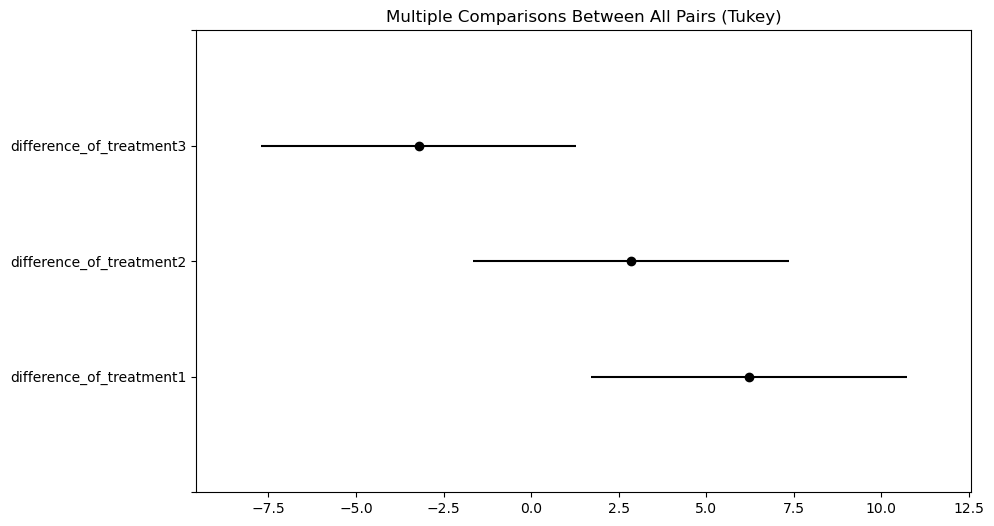

In [84]:
#Tukey HSD test(post hoc test)

mc = sm.stats.multicomp.MultiComparison(d_melt['value'],d_melt['treatments'])
mc_results = mc.tukeyhsd()
print(mc_results.plot_simultaneous())
mc_results.summary()

When comparing the three treatment groups with each other using Tukey HSD test, we could observe that treatment_1 and treatment_3 have a significant difference in means since the adjusted p-value (0.0388) is less than the significance value (0.05). Whereas, the comparison of treatment_1 and treatment_2 as well as the comparison of treatment_2 and treatment_3 show that there is no difference in means since their repective adjusted p-values (0.6392 and 0.2412) are greater than the significance value (0.05).

# Assumptions:

1. Normality Check - Using QQ Plot, Histogram and Shapiro-Wilk test

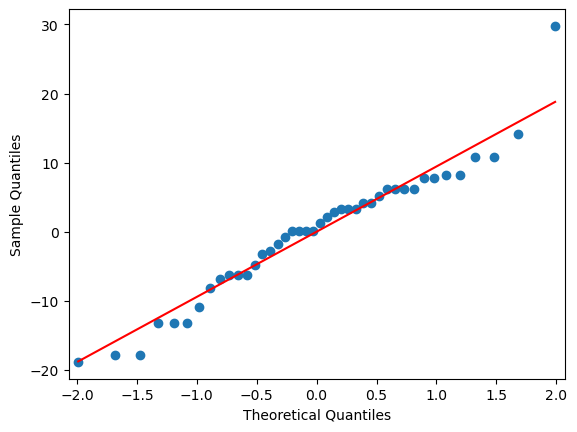

In [16]:
# QQ Plot

res = model.resid
fig = sm.qqplot(res, line = 's')

The data points closely follow the 45 degree angle line in red. Hence, the data is approximately normally distributed.


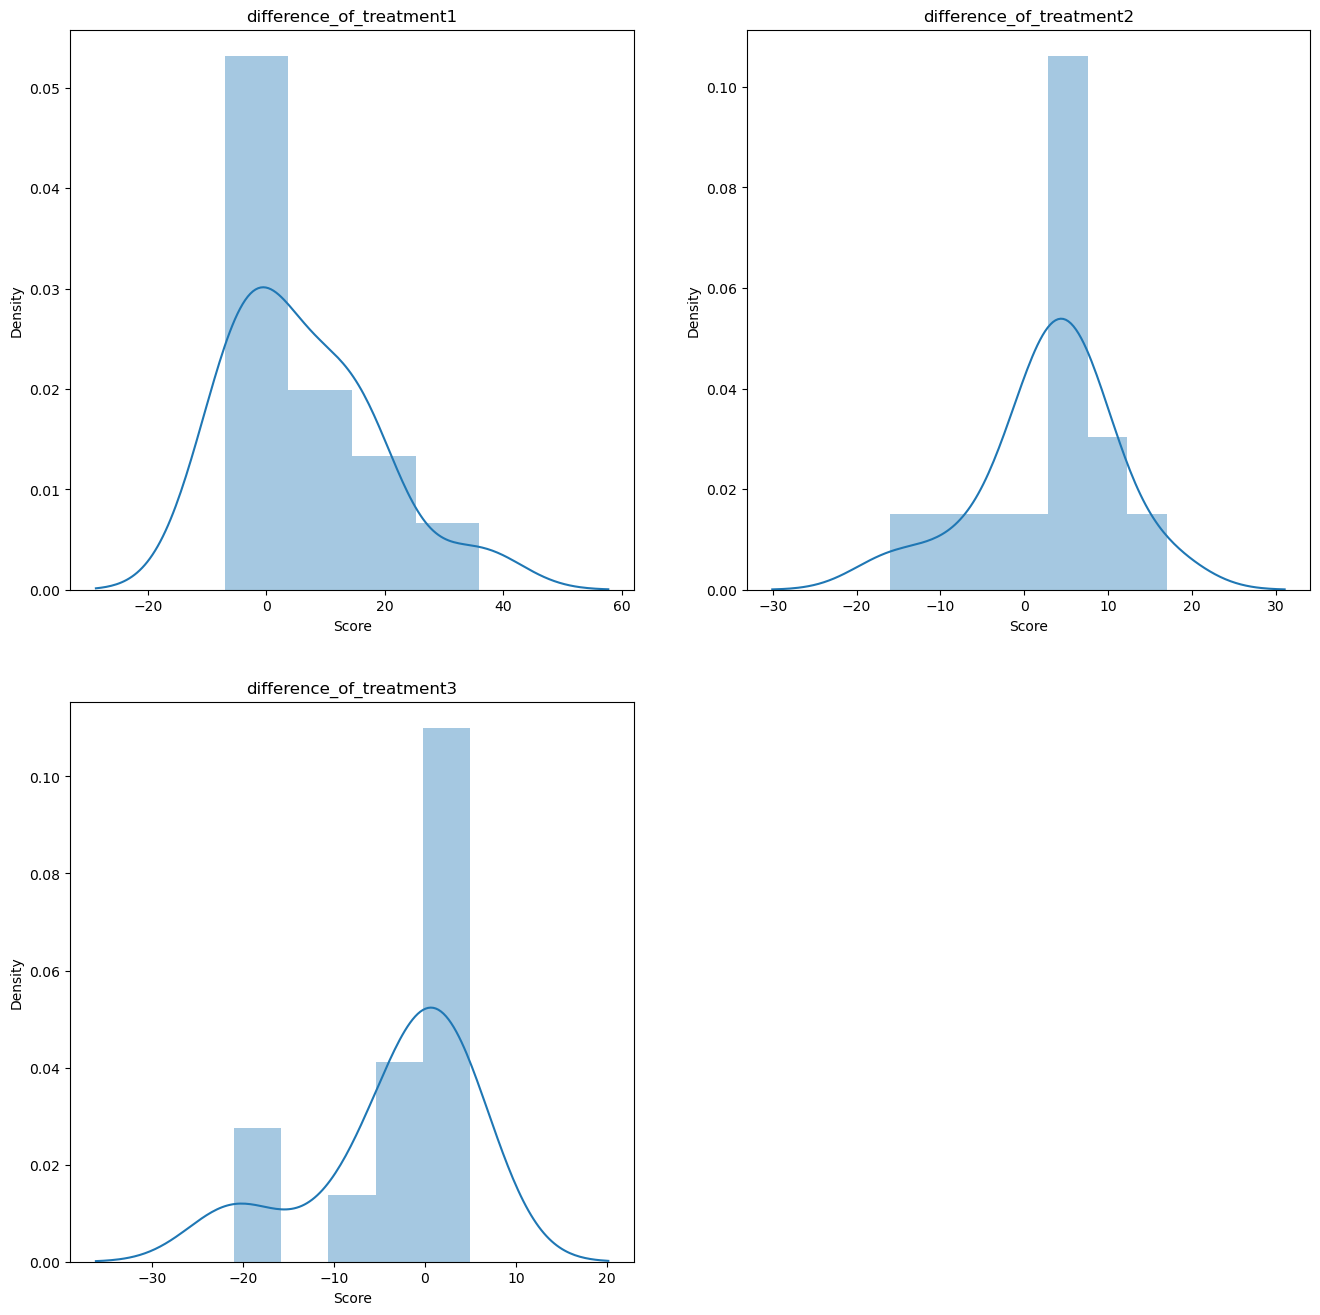

In [85]:
figure, axes = plt.subplots(2, 2, figsize=(16, 16))
axes[1, 1].axis('off')

# Plotting histograms using sns.distplot
sns.distplot(df1['difference_of_treatment1'], ax=axes[0][0])
axes[0][0].set_xlabel("Score")
axes[0][0].set_ylabel("Density")
axes[0][0].set_title("difference_of_treatment1")

sns.distplot(df1['difference_of_treatment2'], ax=axes[0][1])
axes[0][1].set_xlabel("Score")
axes[0][1].set_ylabel("Density")
axes[0][1].set_title("difference_of_treatment2")

sns.distplot(df1['difference_of_treatment3'], ax=axes[1][0])
axes[1][0].set_xlabel("Score")
axes[1][0].set_ylabel("Density")
axes[1][0].set_title("difference_of_treatment3")

plt.show()

Seaborn plots provide a versatile means to showcase histograms coupled with a line. This combination of a histogram and a line can be effectively presented through the utilization of Seaborn and Matplotlib, two robust Python plotting modules that seamlessly integrate to offer diverse visualization options.

In [20]:
# Shapiro-Wilk Test

w, pvalue = stats.shapiro(model.resid)
pvalue

0.11303776502609253

Since the p-value from the Shapiro-Wilk test is greater than the significance level of 0.05, there is sufficient evidence to suggest that the data follows a normal distribution.

2. Homogeneity for equal variances - Using Bartlett's and Levene's variance test

In [21]:
#Bartlett's test 

w, pvalue = stats.bartlett(d_melt['score_diffs'][d_melt['treatments']=='treatment_1'],d_melt['score_diffs'][d_melt['treatments']=='treatment_2'],d_melt['score_diffs'][d_melt['treatments']=='treatment_3'])
print("Bartlett's test:\tw:{:7.4f}, pvalue:{:7.4f}".format(w, pvalue))

Bartlett's test:	w: 2.9050, pvalue: 0.2340


Since the p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis of Baretlett's test that the variances are equal across the three treatment groups. Hence, the homogeneity for equal variances is proven using the Bartlett's test.

In [22]:
# Levene's variance test

w, pvalue = stats.levene(d_melt['score_diffs'][d_melt['treatments']=='treatment_1'],d_melt['score_diffs'][d_melt['treatments']=='treatment_2'],d_melt['score_diffs'][d_melt['treatments']=='treatment_3'])
print("Levene's test:\t\tw:{:7.4f}, pvalue:{:7.4f}".format(w, pvalue))

Levene's test:		w: 1.3961, pvalue: 0.2597


Since the p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis of Levene's test that the variances are equal across the three treatment groups. Hence, the homogeneity for equal variances is proven using the Levene's test.

#### As the Bartlett's test and Levene's Test both have p-value > alpha* (0.005), we can conclude that our ANOVA analysis is true.

# Final conclusion

After subjecting the data to Bartleet, Levene, and Shapiro-Wilk tests, the ANOVA analysis yielded a significant p-value. Surprisingly, we chose not to reject the null hypothesis, suggesting no significant differences in variances. However, subsequent explorations using boxplots, Tukey's HSD test, and other statistical methods revealed distinct group means. Remarkably, when conducting pairwise comparisons, the null hypothesis was rejected, indicating statistically significant differences among the groups.

Furthermore, the Q-Q plot showcased a bell-shaped curve, affirming a normal distribution in the data. This implies a high likelihood that future observations will follow a similar pattern. In summary, while variances may not significantly differ, there are clear distinctions in group means, highlighting the importance of examining multiple facets of the data for a comprehensive understanding.